In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [3]:
# Create Model
model = Sequential()

In [4]:
# Add Layers
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
# Compiling the data
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
# Loading the Dataset
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
np.unique(y_train, return_counts=True)

In [10]:
# Data preprocessing
def preprocess_data(x, y):

  x = x.reshape((-1, 28, 28, 1))
  x = x/255.0
  y = np_utils.to_categorical(y)
  return x, y

x_train, y_train = preprocess_data(x_train , y_train)
print(x_train.shape , y_train.shape)
x_test , y_test  = preprocess_data(x_test , y_test)
print(x_test.shape , y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [11]:
# Fitting and Training the data
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 35s 7ms/step - loss: 0.6051 - accuracy: 0.8184 - val_loss: 0.0614 - val_accuracy: 0.9810
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0668 - accuracy: 0.9793 - val_loss: 0.0447 - val_accuracy: 0.9867
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0403 - val_accuracy: 0.9875
Epoch 4/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0350 - val_accuracy: 0.9908
Epoch 5/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0281 - accuracy: 0.9907 - val_loss: 0.0360 - val_accuracy: 0.9902
Epoch 6/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0362 - val_accuracy: 0.9895
Epoch 7/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0312 - val_accuracy: 0.9915
Epoch

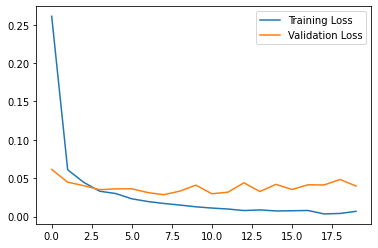

In [13]:
plt.figure()
plt.plot(hist.history['loss'] , label = 'Training Loss')
plt.plot(hist.history['val_loss'] , label = 'Validation Loss')
plt.legend()
plt.show()

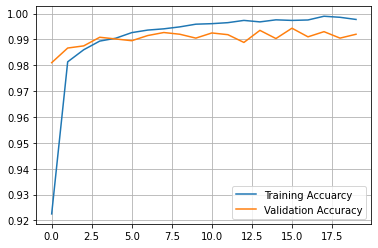

In [15]:
plt.figure()
plt.plot(hist.history['accuracy'] , label = 'Training Accuarcy')
plt.plot(hist.history['val_accuracy'] , label = 'Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

In [18]:
np.argmax(hist.history['val_accuracy'])

15

In [19]:
hist = model.fit(x_train, y_train, epochs = 15, batch_size = 128)

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0098 - accuracy: 0.9974
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0054 - accuracy: 0.9985
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0055 - accuracy: 0.9980
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0040 - accuracy: 0.9988
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0044 - accuracy: 0.9986
Epoch 8/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0042 - accuracy: 0.9985
Epoch 9/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 10/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.9991

In [20]:
# Model Evaluation
model.evaluate(x_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9910


[0.037109214812517166, 0.9909999966621399]

In [22]:
# Predictions
probas = model.predict(x_test)

labels = np.argmax(probas, axis=1)    
print(labels)

[7 2 1 ... 4 5 6]


In [25]:
labels.shape

(10000,)

In [26]:
# Getting labels as one-hot encoders
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit_transform(labels)

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])